# Predicting the price of houses in Ames using Artificial Intelligence and Machine Learning

In this notebook, we will go through the Ames housing dataset to predict the sale price of a house.

# 1. Problem Definition

How well can we predict the future sale price of a house in Ames, Iowa given its characteristics?

# 2. Data

The data is downloaded from Kaggle. The dataset has 82 columns and about 2930 rows which we will split using `train_test_split` after completing our data cleanup and analysis.

# 3. Evaluation Metrics

Since this is a regression problem we would like to use a metric to show how good our model is. I will try to get the highest $ R^2 $ possible, hopefully above 0.8.

We will also have a look at other accuracy metrics and try to optimize our model using it.

# 4. Features

There are a lot of features in this dataset. 82 to be precise, I will go through the features while providing a small description.

* Order: Observation number
* PID: Parcel identification number - can be used with city web site for parcel review.
* MS SubClass: Identifies the type of dwelling involved in the sale.
* MS Zoning: Identifies the general zoning classification of the sale.
* Lot Frontage: Linear feet of street connected to property
* Lot Area: Lot size in square feet
* Street: Type of road access to property
* Alley: Type of alley access to property
* Lot Shape: General shape of property
* Land Contour: Flatness of the property
* Utilities: Type of utilities available
* Lot Config: Lot configuration
* Land Slope: Slope of property
* Neighborhood: Physical locations within Ames city limits (map available)
* Condition 1: Proximity to various conditions
* Condition 2: Proximity to various conditions (if more than one is present)
* Bldg Type: Type of dwelling
* House Style: Style of dwelling
* Overall Qual: Rates the overall material and finish of the house
* Overall Cond: Rates the overall condition of the house
* Year Built: Original construction date
* Year Remod/Add: Remodel date (same as construction date if no remodeling or additions)
* Roof Style: Type of roof
* Roof Matl: Roof material
* Exterior 1: Exterior covering on house
* Exterior 2: Exterior covering on house (if more than one material)
* Mas Vnr Type: Masonry veneer type
* Mas Vnr Area: Masonry veneer area in square feet
* Exter Qual: Evaluates the quality of the material on the exterior
* Exter Cond: Evaluates the present condition of the material on the exterior
* Foundation: Type of foundation
* Bsmt Qual: Evaluates the height of the basement
* Bsmt Cond: Evaluates the general condition of the basement
* Bsmt Exposure: Refers to walkout or garden level walls
* BsmtFin Type 1: Rating of basement finished area
* BsmtFin SF 1: Type 1 finished square feet
* BsmtFinType 2: Rating of basement finished area (if multiple types)
* BsmtFin SF 2: Type 2 finished square feet
* Bsmt Unf SF: Unfinished square feet of basement area
* Total Bsmt SF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* Central Air: Central air conditioning
* Electrical: Electrical system
* 1st Flr SF: First Floor square feet
* 2nd Flr SF: Second floor square feet
* Low Qual Fin SF: Low quality finished square feet (all floors)
* Gr Liv Area: Above grade (ground) living area square feet
* Bsmt Full Bath: Basement full bathrooms


* Bsmt Half Bath: Basement half bathrooms
* Full Bath: Full bathrooms above grade
* Half Bath: Half baths above grade
* Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
* Kitchen: Kitchens above grade
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality (Assume typical unless deductions are warranted)
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* Garage Type: Garage location
* Garage Yr Blt: Year garage was built
* Garage Finish: Interior finish of the garage
* Garage Cars: Size of garage in car capacity
* Garage Area: Size of garage in square feet
* Garage Qual: Garage quality
* Garage Cond: Garage condition
* Paved Drive: Paved driveway
* Wood Deck SF: Wood deck area in square feet
* Open Porch SF: Open porch area in square feet
* Enclosed Porch: Enclosed porch area in square feet
* 3-Ssn Porch: Three season porch area in square feet
* Screen Porch: Screen porch area in square feet
* Pool Area: Pool area in square feet
* Pool QC: Pool quality
* Fence: Fence quality
* Misc Feature: Miscellaneous feature not covered in other categories
* Misc Val: $Value of miscellaneous feature
* Mo Sold: Month Sold
* Yr Sold: Year Sold
* Sale Type: Type of sale
* Sale Condition: Condition of sale

Found information on: https://cran.r-project.org/web/packages/AmesHousing/AmesHousing.pdf


# Preparing the tools: 

We're gonna use pandas, numpy and matplotlib for data analysis and manipulation. We will also be using scikit-learn for encoders 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("data/AmesHousing.csv", low_memory= False)
df.shape

(2930, 82)

In [16]:
pd.set_option('display.max_columns', None)
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [17]:
# Get info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [18]:
# Check for null values in dataset
pd.set_option('display.max_rows', None) 
df.isna().sum()

Order                 0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        490
Lot Area              0
Street                0
Alley              2732
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type       1775
Mas Vnr Area         23
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            80
Bsmt Cond            80
Bsmt Exposure        83
BsmtFin Type 1       80
BsmtFin SF 1          1
BsmtFin Type 2       81
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

So there are a lot of null values in the dataset that we'll have to fill up

In [19]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [20]:
df.dtypes

Order                int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

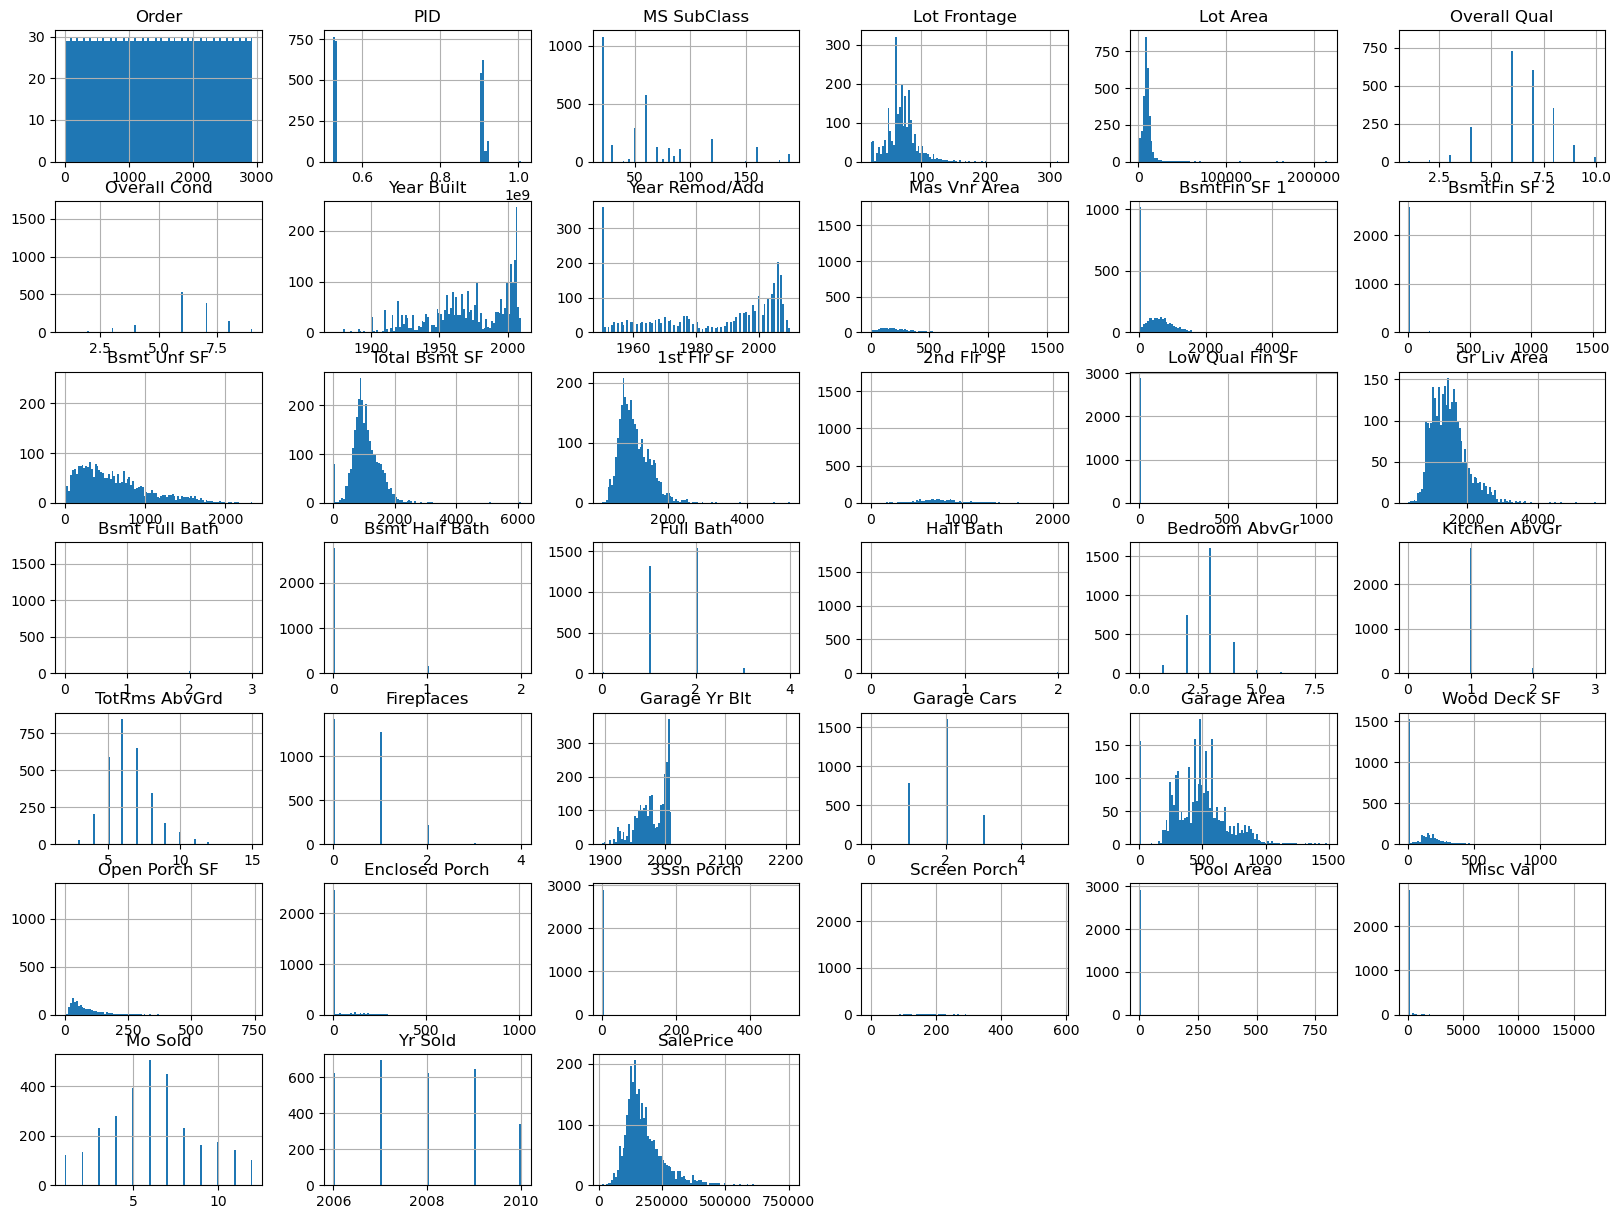

In [21]:
# Plot histogram of the datatypes which are numeric
df.hist(bins=100, figsize=(20,15))
plt.show()

### Observation on "Order" Field:
Field Description: The "Order" field represents the observation number of each house in the dataset.
Relevance: It appears that the order in which the survey was conducted does not have a direct impact on the price of the house.
Decision: I will keep this field for now but plan to drop it after performing Exploratory Data Analysis (EDA) to confirm whether it is irrelevant to the model.

### Analysis on "PID" Field:
Field Description: The "PID" field contains the parcel identification number (also known as parcel ID, geo/map reference number, or PIN).

What is PID?: It is a unique 10-digit number assigned to each tax parcel by the Ames Assessor. The format is typically XX-XX-XXX-XXX, which breaks down as:

XX: Township
XX: Section
XXX: Block
XXX: Parcel
Usefulness: Given that the "PID" contains geographical references (township, section, block), it could provide valuable insights into the location-based features that may affect house prices.

I plan to extract and create new features based on the "PID" number, including variables like the town, section, and block, to enhance our model.

Reference: https://www.storycountyiowa.gov/FAQ.aspx?QID=169#:~:text=FAQs-,What%20is%20a%20parcel%20number?,Geo%20Numbering%20in%20Story%20County

#### Let's check our `SalePrice` column

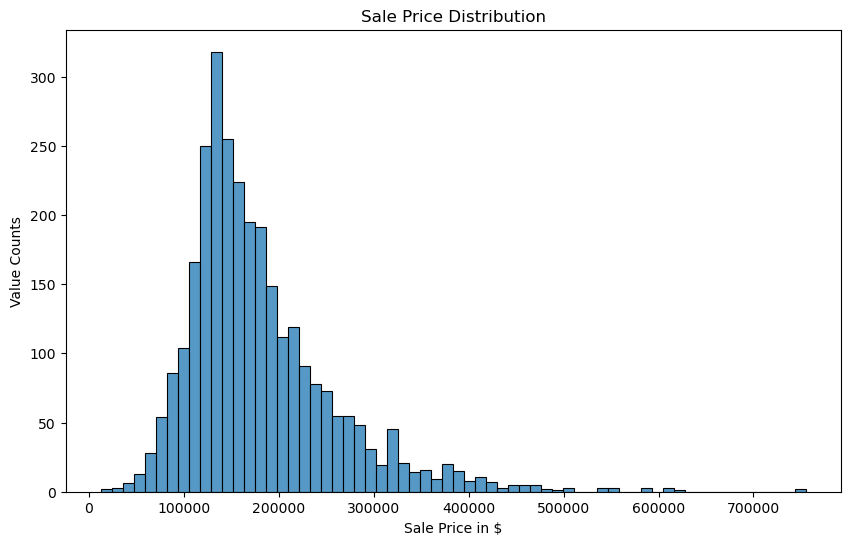

In [22]:
plt.figure(figsize = (10, 6))
sns.histplot(df['SalePrice'])
plt.xlabel("Sale Price in $")
plt.ylabel("Value Counts")
plt.title("Sale Price Distribution")
plt.show()

In [23]:
# These are the numeric columns in our df
df.select_dtypes(include=['number']).columns

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

In [24]:
# Lets check for null values
df.isna().sum().sort_values(ascending = False)

Pool QC            2917
Misc Feature       2824
Alley              2732
Fence              2358
Mas Vnr Type       1775
Fireplace Qu       1422
Lot Frontage        490
Garage Qual         159
Garage Yr Blt       159
Garage Cond         159
Garage Finish       159
Garage Type         157
Bsmt Exposure        83
BsmtFin Type 2       81
Bsmt Qual            80
Bsmt Cond            80
BsmtFin Type 1       80
Mas Vnr Area         23
Bsmt Full Bath        2
Bsmt Half Bath        2
Total Bsmt SF         1
BsmtFin SF 1          1
BsmtFin SF 2          1
Garage Area           1
Garage Cars           1
Bsmt Unf SF           1
Electrical            1
Lot Shape             0
Street                0
Lot Area              0
MS SubClass           0
MS Zoning             0
Order                 0
PID                   0
House Style           0
Bldg Type             0
Condition 2           0
Condition 1           0
Neighborhood          0
Land Slope            0
Lot Config            0
Utilities       

## Filling null values: 

Let's have a look at the features with the most null values

* `Pool QC`: Pool quality           
* `Misc Feature`: Miscellaneous feature not covered in other categories
* `Alley`: Type of alley access to property
* `Fence`: Fence quality
* `Mas Vnr Type`: Masonry veneer type
* `Fireplace Qu`: Fireplace quality
* `Lot Frontage`: Linear feet of street connected to property        
* `Garage Qual`: Garage quality
* `Garage Yr Blt`: Year garage was built
* `Garage Cond`: Garage condition
* `Garage Finish`: Interior finish of the garage
* `Garage Type`: Garage location
* `Bsmt Exposure`: Refers to walkout or garden level walls     
* `BsmtFin Type 2`: Type 2 finished square feet
* `Bsmt Qual`: Evaluates the height of the basement           
* `Bsmt Cond`: Evaluates the general condition of the basement   
* `BsmtFin Type 1`: Rating of basement finished area  
* `Mas Vnr Area`: Masonry veneer area in square feet  

#### For categorical features: 

Features like `Pool QC`, `Misc Feature`, `Alley`, `Fence`, `Fireplace Qu`, `Garage Qual`, `Garage Cond`, `Garage Finish`, `Garage Type`, `Bsmt Exposure`, `BsmtFin Type 2`, `Bsmt Qual`, `Bsmt Cond`, `BsmtFin Type 1`, and `Mas Vnr Type` have null values. We can make a safe assumption that if Pool QC or Misc Feature is Null it means the house does not have a pool or any other miscellaneous feature not covered in other categories so we will fill them with None.

#### For numerical features:

* Basement-related features (`Bsmt Full Bath`, `Bsmt Half Bath`, `Total Bsmt SF`, `BsmtFin SF 1`, `BsmtFin SF 2`, `Bsmt Unf SF`): If missing, it is safe to assume that there is no basement so we will fill it with 0
* Garage-related features (`Garage Area`, `Garage Cars`, `Garage Yr Blt`): If missing, the house has no garage so we will fill it with 0.
* `Lot Frontage`: Since lot size varies by neighborhood, missing values will be filled with the median per neighborhood.
* `Electrical`: Only one missing value; it will be filled with the most common value (mode()).

In [25]:
categorical_features_with_null = ["Pool QC", "Misc Feature", "Alley", "Fence", "Fireplace Qu", "Garage Qual",
                        "Garage Cond", "Garage Finish", "Garage Type", "Bsmt Exposure", "BsmtFin Type 2",
                        "Bsmt Qual", "Bsmt Cond", "BsmtFin Type 1", "Mas Vnr Type"]

for col in categorical_features_with_null:
    df[col] = df[col].fillna("None")

In [27]:
df.isna().sum().sort_values(ascending = False)

Lot Frontage       490
Garage Yr Blt      159
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 2         1
Bsmt Unf SF          1
Electrical           1
BsmtFin SF 1         1
Garage Cars          1
Garage Area          1
Total Bsmt SF        1
PID                  0
Lot Area             0
Street               0
MS SubClass          0
MS Zoning            0
Order                0
House Style          0
Bldg Type            0
Condition 2          0
Condition 1          0
Neighborhood         0
Land Slope           0
Lot Config           0
Utilities            0
Land Contour         0
Lot Shape            0
Alley                0
Exterior 2nd         0
Roof Style           0
Overall Qual         0
Year Built           0
Overall Cond         0
Bsmt Exposure        0
Bsmt Cond            0
Bsmt Qual            0
Foundation           0
Exter Cond           0
Exter Qual           0
Mas Vnr Type         0
BsmtFin Type 2       0
Heating QC           0
Heating    

In [43]:
df["Garage Yr Blt"] = df["Garage Yr Blt"].fillna(df["Year Built"])

In [44]:
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [45]:
df["Lot Frontage"] = df.groupby("Neighborhood")["Lot Frontage"].transform(lambda x: x.fillna(x.median()))

In [46]:
df["Lot Frontage"] = df["Lot Frontage"].fillna(df["Lot Frontage"].median())

In [47]:
bsmt_features = ["Bsmt Full Bath", "Bsmt Half Bath", "Total Bsmt SF", "Bsmt Unf SF", "BsmtFin SF 1", "BsmtFin SF 2"]
df[bsmt_features] = df[bsmt_features].fillna(0)

In [48]:
df["Garage Cars"] = df["Garage Cars"].fillna(0)
df["Garage Area"] = df["Garage Area"].fillna(0)

In [49]:
df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])

In [50]:
df.isna().sum().sort_values(ascending = False)

Order              0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area  